In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_path_1 = '/content/gdrive/My Drive/powerfactory_files/RMS_FULL_26_Processed/bin'
data_path_2 = '/content/gdrive/My Drive/powerfactory_files/RMS_FULL_26_Processed/bin_calc'

In [6]:
multi_val_performance_2 = np.load(data_path_2+'/val_results.npy',allow_pickle='TRUE').item()
multi_performance_2 = np.load(data_path_2+'/test_results.npy',allow_pickle='TRUE').item()

In [7]:
multi_val_performance_1 = np.load(data_path_1+'/val_results.npy',allow_pickle='TRUE').item()
multi_performance_1 = np.load(data_path_1+'/test_results.npy',allow_pickle='TRUE').item()

In [8]:
multi_val_performance_1

{'Bi-LSTM': [0.04852677881717682, 0.048526763916015625],
 'Conv': [0.08874721825122833, 0.08874765038490295],
 'Dense': [0.16489458084106445, 0.16489461064338684],
 'LSTM': [0.04663284868001938, 0.04663272202014923],
 'Last': [0.42425310611724854, 0.2827436923980713],
 'Linear': [0.2357468158006668, 0.23574645817279816]}

In [9]:
multi_performance_1

{'Bi-LSTM': [0.05302947759628296, 0.05302963778376579],
 'Conv': [0.09461093693971634, 0.09461082518100739],
 'Dense': [0.18046244978904724, 0.18046261370182037],
 'LSTM': [0.04988645762205124, 0.04988643899559975],
 'Last': [0.4132801592350006, 0.2733723521232605],
 'Linear': [0.2359747737646103, 0.2359747588634491]}

In [10]:
multi_val_performance_2

{'Bi-LSTM': [0.05572345107793808, 0.055723387748003006],
 'Conv': [0.1256888508796692, 0.12568888068199158],
 'Dense': [0.12150808423757553, 0.12150806933641434],
 'Encoder_Decoder': [0.0421, 0.0421],
 'LSTM': [0.07455168664455414, 0.07455146312713623],
 'Linear': [0.4599536955356598, 0.36894071102142334]}

In [11]:
multi_performance_2

{'Bi-LSTM': [0.06416937708854675, 0.06416929513216019],
 'Conv': [0.1424606591463089, 0.14246082305908203],
 'Dense': [0.13975928723812103, 0.13975921273231506],
 'Encoder_Decoder': [0.0471, 0.0471],
 'LSTM': [0.0831521600484848, 0.08315212279558182],
 'Linear': [0.5355753898620605, 0.38117626309394836]}

In [12]:
multi_val_performance_1['Encoder_Decoder'] = [0.0458, 0.0458]
multi_performance_1['Encoder_Decoder'] = [0.0520, 0.0520]

In [13]:
multi_val_performance_2['Last'] = [0.2827436923980713, 0.2827436923980713]
multi_performance_2['Last'] = [0.2733723521232605, 0.2733723521232605]

In [14]:
def plot_results(validation_res_dictionary, res_dictionary,
                 labels, title=None, reverse=False):
  
  """
  Function to plot results from dictionary
  Param: validation_res_dictionary - validation accuracy
  Param: res_dictionary - test accuracy
  Param: labels - labels to be used for plotting
  """

  fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
  x = np.arange(len(validation_res_dictionary))
  width = 0.3
  metric_name = 'mean_absolute_error'
  val_mae = [v[1] for v in validation_res_dictionary.values()]
  test_mae = [v[1] for v in res_dictionary.values()]

  if reverse:
    val_mae.sort(reverse=True)
    test_mae.sort(reverse=True)

  plt.ylabel('MAE averaged across all features and time steps [normalised]')
  plt.bar(x - 0.17, val_mae, width, label='Validation')
  plt.bar(x + 0.17, test_mae, width, label='Test')
  plt.xticks(ticks=x, labels=labels,
            rotation=45)
  plt.title(title)
  plt.grid(color='k', ls = '-.', lw = 0.25)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  _ = plt.legend()

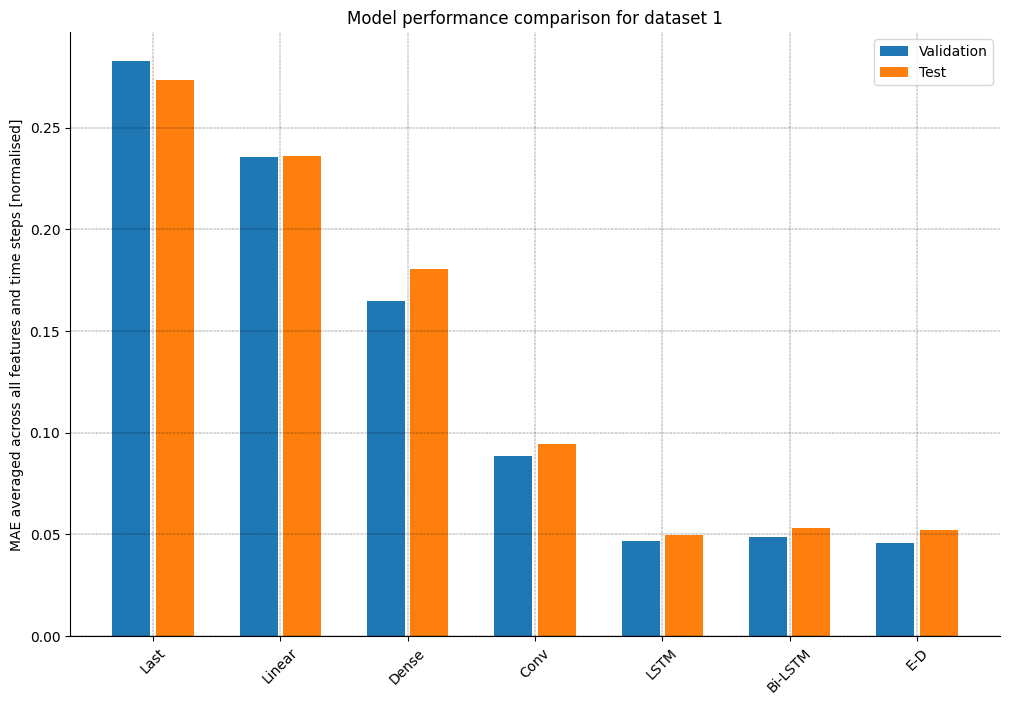

In [15]:
LABELS = ['Last', 'Linear', 'Dense', 'Conv', 'LSTM', 'Bi-LSTM', 'E-D']

plot_results(multi_val_performance_1, multi_performance_1,
                 LABELS, "Model performance comparison for dataset 1")

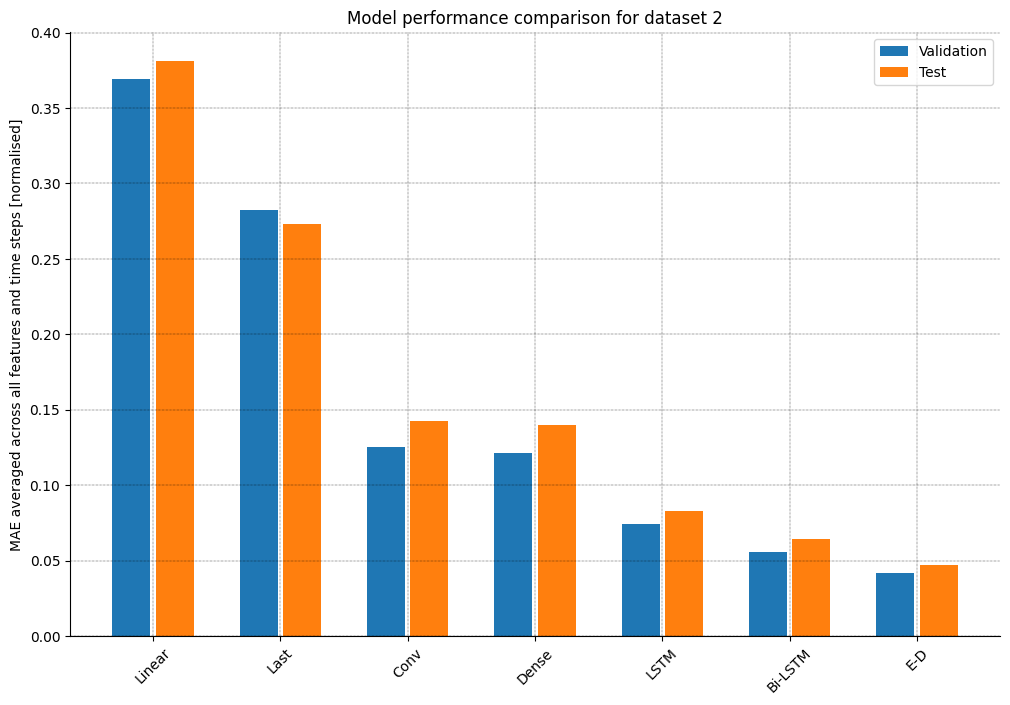

In [16]:
LABELS = ['Linear', 'Last', 'Conv', 'Dense', 'LSTM', 'Bi-LSTM', 'E-D']

plot_results(multi_val_performance_2, multi_performance_2,
             LABELS, "Model performance comparison for dataset 2",
             reverse=True)